In [1]:
import QDYN

In [2]:
from os.path import join

In [3]:
import matplotlib.pylab as plt

In [4]:
import os
import re

# Analysis: Convergence Behavior of optimizations

*This notebook used a buggy version of QDYN where the MCWF trajectory optimization would use a simple non-Hermtian propagation for the forward propagation*

We graphically look at the convergence of every optimization in order to decide whether that optimization should continue, or whether it is considered "converged"

In [5]:
DATA_ROOT = './data/dicke1_QSL_1traj_xxx'

In [6]:
RX_LEAFFOLDER = re.compile(r'rf_(?P<nodes>\d+)nodes_T(?P<T>[\d_]+)')

In [7]:
def plot_conv(rfs):
    from mgplottools.mpl import set_axis
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)
    plot_conv_on_ax(rfs, ax)
    ax.set_xlabel("iteration")
    ax.set_ylabel("error")
    ax.set_yscale('log')
    #set_axis(ax, 'x', 0, 10, 1, minor=2)
    plt.show(fig)

In [8]:
def plot_conv_on_ax(rfs, ax):
    """Plot all the runfolders on the given axes (modifies `ax` in place)"""
    conv = QDYN.octutils.OCTConvergences()
    for rf in rfs:
        conv.load_file(
            rf.split('/')[-1], join(rf, 'oct_iters.dat'))
    for (key, data) in conv.data.items():
        ax.plot(data.iter, data.J_T, label=key)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [9]:
def T_as_float(rf):
    T_str = RX_LEAFFOLDER.match(os.path.split(rf)[-1]).group('T')
    return float(T_str.replace('_', '.'))

In [10]:
def collect_runfolders(data_root, n_nodes=None, T_min=None, T_max=None):
    """Collect runfolder from root, optionally filtering for
    only a number of nodes and range of T values"""
    runfolders = []
    for dirpath, dirnames, filenames in os.walk(data_root):
        if not dirnames:
            match = RX_LEAFFOLDER.match(os.path.split(dirpath)[-1])
            if match:
                skip = False
                if n_nodes is not None and int(n_nodes) != int(match.group('nodes')):
                    skip = True
                if T_min is not None and T_as_float(dirpath) <= float(T_min):
                    skip = True
                if T_max is not None and T_as_float(dirpath) > float(T_max):
                    skip = True
                if not skip:
                    runfolders.append(dirpath)
            else:
                print(
                    "%s does not match %s" % (dirpath, rx_leaffolder.pattern))
    return runfolders

In [11]:
def plot_nodes_summary(n_nodes, splits, T_max=None, floor=None, iter_max=20000, height=3):
    import matplotlib.gridspec as gridspec
    n = len(splits) + 1
    fig = plt.figure(figsize=(10, height*n))
    gs = gridspec.GridSpec(n, 1)
    gs.update(wspace=0.0, hspace=0.0)
    T_min = 0
    for i, T_max in enumerate(splits + [T_max, ]):
        rfs = sorted(
            collect_runfolders(DATA_ROOT, n_nodes, T_min, T_max),
            key=T_as_float)
        T_min = T_max
        ax = fig.add_subplot(gs[i])
        plot_conv_on_ax(rfs, ax)
        if floor is not None:
            ax.set_ylim(floor, 1)
        ax.set_xlim(0, iter_max)
        if i == n-1:
            ax.set_xlabel("iteration")
        ax.set_ylabel("error")
        ax.set_yscale('log')
        ax.grid()
    plt.show(fig)

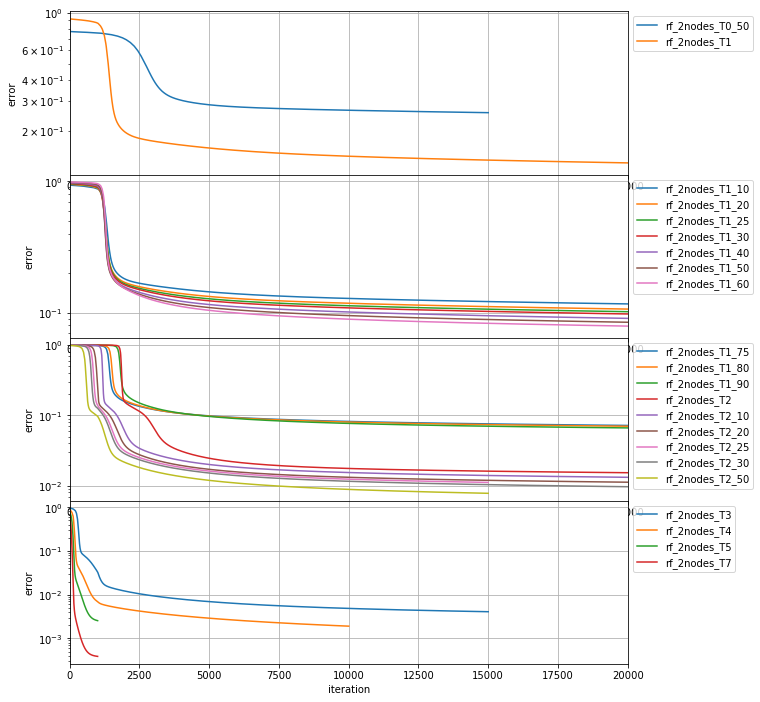

In [12]:
plot_nodes_summary(2, [1.0, 1.7, 2.5], T_max=8.0, height=3)

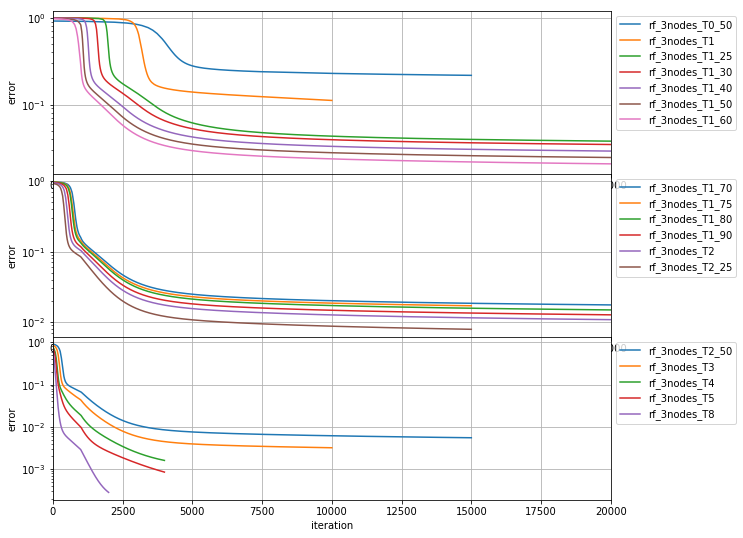

In [13]:
plot_nodes_summary(3, [1.6, 2.4], T_max=8.0, height=3)

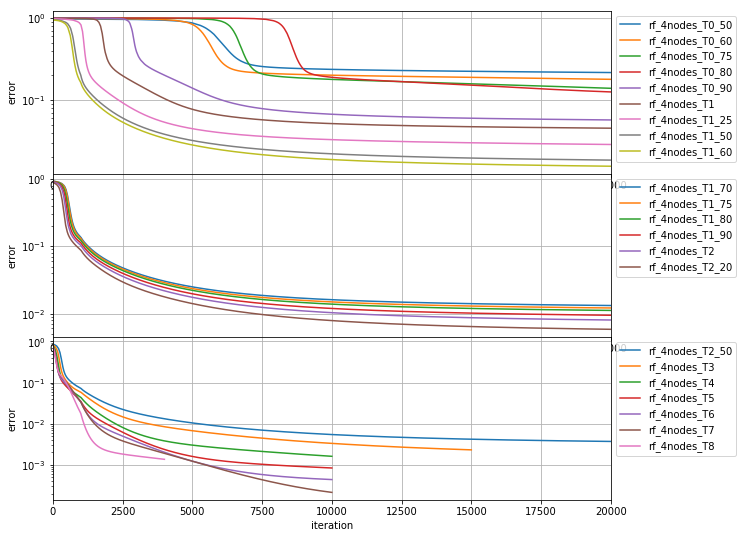

In [14]:
plot_nodes_summary(4, [1.6, 2.4], T_max=8.0, height=3)

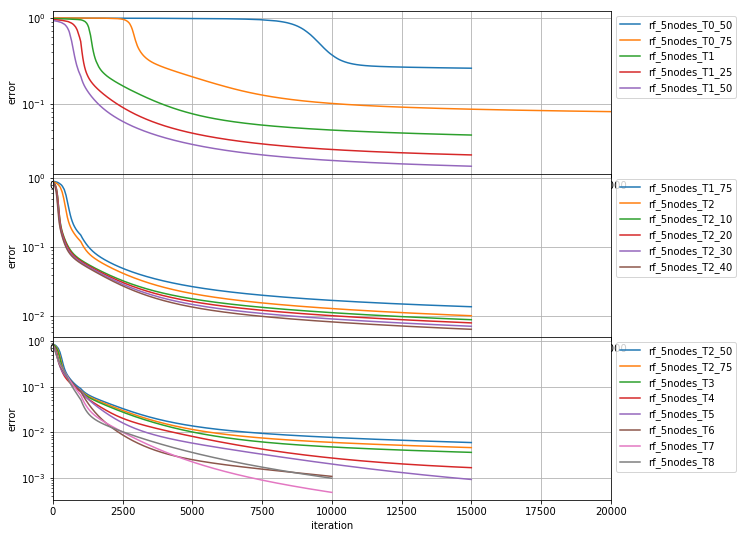

In [15]:
plot_nodes_summary(5, [1.6, 2.4], T_max=8.0, height=3)

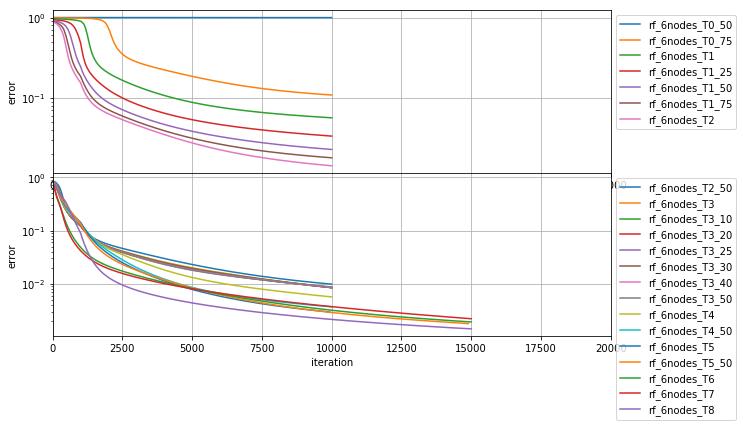

In [16]:
plot_nodes_summary(6, [2.4], T_max=8.0, height=3)

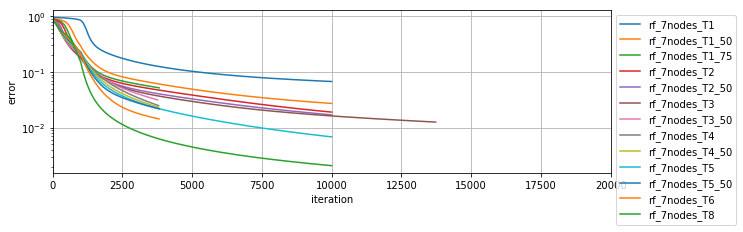

In [17]:
plot_nodes_summary(7, [], T_max=8.0, height=3)